In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("data_for_algo2")

# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Derive a composite metric representing state progressiveness
# We'll combine 'Progress', 'Expenditure', 'Org_Cost', and anomaly-based insights
# You can tweak the weights (0.4, 0.3, etc.) depending on importance

# 1️⃣ Compute cost efficiency (if Rev_Cost exists)
df['Cost_Efficiency'] = df['Org_Cost'] / (df['Rev_Cost'] + 1e-6)

# 2️⃣ Group by State and aggregate key indicators
state_progress = df.groupby('State').agg({
    'Progress': 'mean',
    'Expenditure': 'sum',
    'Org_Cost': 'sum',
    'Rev_Cost': 'sum',
    'Cost_Efficiency': 'mean',
    'anomaly_score': 'mean',   # low anomaly → more stable projects
}).reset_index()

# 3️⃣ Compute a Progress Score (you can modify the weights as needed)
state_progress['Progress_Score'] = (
    state_progress['Progress'] * 0.5 +
    (state_progress['Expenditure'] / state_progress['Org_Cost']) * 0.3 +
    state_progress['Cost_Efficiency'] * 0.15 +
    (1 - state_progress['anomaly_score']) * 0.05   # penalize higher anomalies
)

# 4️⃣ Sort states
most_progressive = state_progress.sort_values(by='Progress_Score', ascending=False)
least_progressive = state_progress.sort_values(by='Progress_Score', ascending=True)

print("\n🏆 Most Progressive States:")
print(most_progressive[['State', 'Progress_Score']].head(10))

print("\n⚠️ Least Progressive States:")
print(least_progressive[['State', 'Progress_Score']].head(10))



🏆 Most Progressive States:
                State  Progress_Score
27         Puducherry       47.467610
21          Meghalaya       46.577207
9                 Goa       45.352528
26          PAN India       45.062172
33            Tripura       37.434016
17             Ladakh       35.934244
1   Andaman & Nicobar       35.200000
20            Manipur       35.146812
32          Telangana       33.299877
5               Bihar       32.893910

⚠️ Least Progressive States:
                                   State  Progress_Score
34                               Unknown        1.035529
22                               Mizoram        2.305993
7   Dadra & Nagar Haveli and Daman & Diu       10.200000
3                      Arunachal Pradesh       12.222811
16                                Kerala       16.973075
31                            Tamil Nadu       18.417908
37                           West Bengal       19.706352
24                                Odisha       19.940705
14         

In [3]:
df = most_progressive[['State', 'Progress_Score']].head(10)
df.to_csv("most_progressive_states.csv", index=False)

In [4]:
df = least_progressive[['State', 'Progress_Score']].head(10)
df.to_csv("least_progressive_states.csv", index=False)

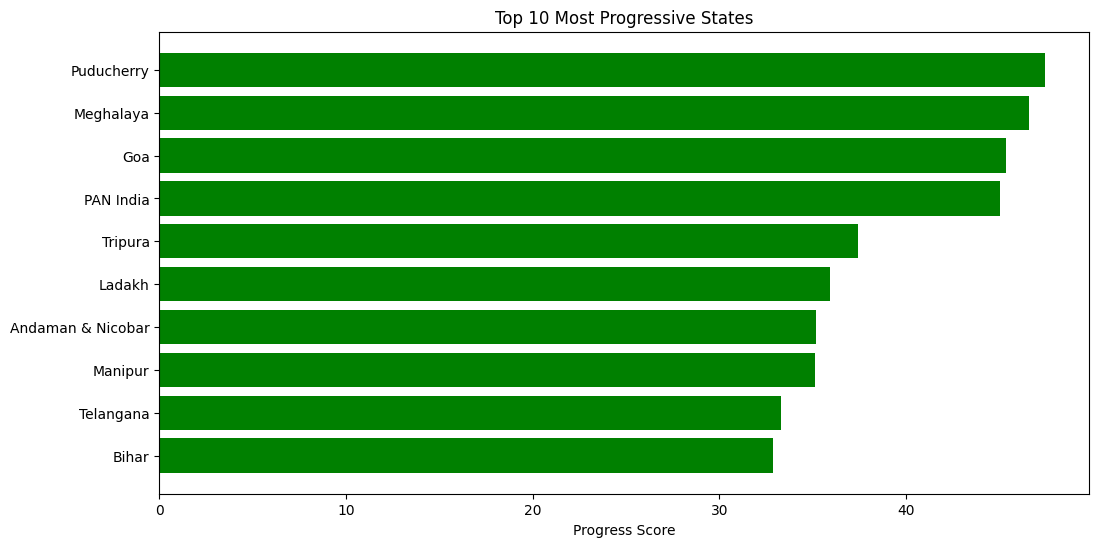

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(most_progressive['State'].head(10), most_progressive['Progress_Score'].head(10), color='green')
plt.title("Top 10 Most Progressive States")
plt.xlabel("Progress Score")
plt.gca().invert_yaxis()
plt.show()


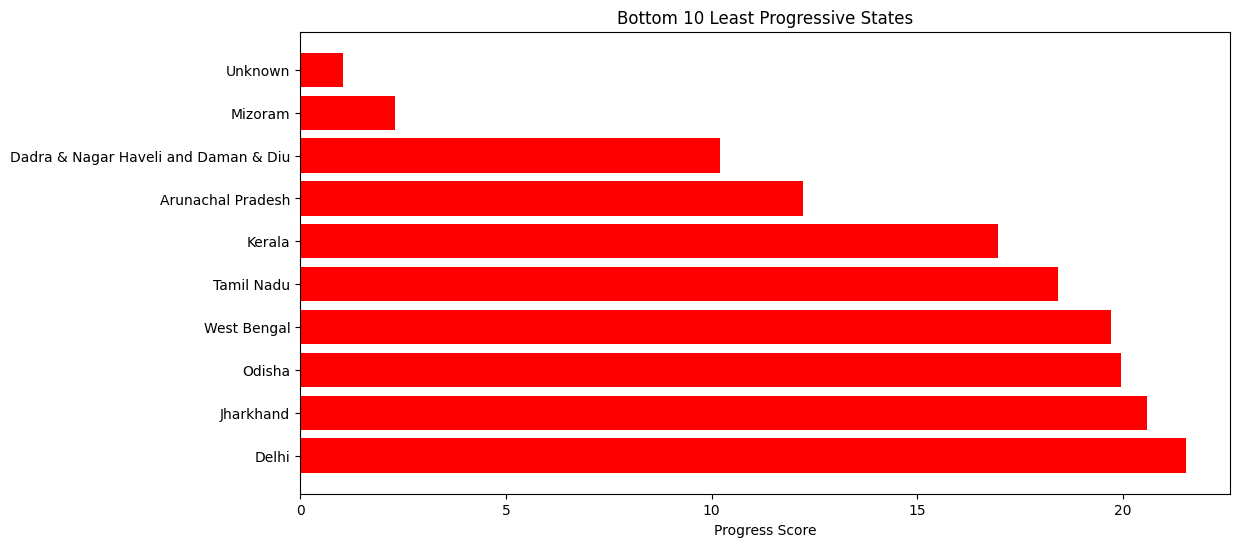

In [6]:
plt.figure(figsize=(12,6))
plt.barh(least_progressive['State'].head(10), least_progressive['Progress_Score'].head(10), color='red')
plt.title("Bottom 10 Least Progressive States")
plt.xlabel("Progress Score")
plt.gca().invert_yaxis()
plt.show()


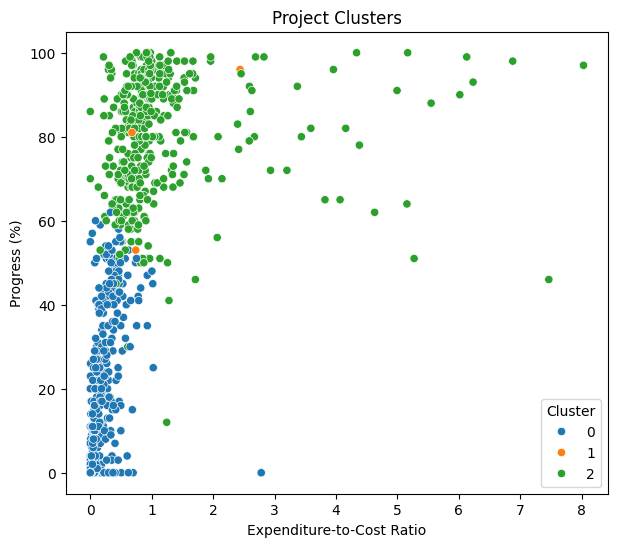


✅ Saved clustered dataset to 'clustered_projects.csv'
Cluster counts:
 Cluster
0    499
2    395
1      4
Name: count, dtype: int64


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load data ===
file_path = "data_for_algo2"   # ensure correct filename
df = pd.read_csv(file_path)

# === 2. Select numeric columns for clustering ===
num_cols = ['Expenditure', 'Progress', 'Org_Cost', 'Rev_Cost',
            'Cost_Diff', 'Cost_Ratio', 'Exp_Cost_Ratio']

# Fill missing values
X = df[num_cols].fillna(0)

# === 3. Standardize data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Apply KMeans clustering ===
k = 3  # number of clusters (you can change this)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# === 5. Visualize clusters ===
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='Exp_Cost_Ratio', y='Progress', hue='Cluster', palette='tab10')
plt.title("Project Clusters")
plt.xlabel("Expenditure-to-Cost Ratio")
plt.ylabel("Progress (%)")
plt.show()

# === 6. Save the DataFrame with cluster labels ===
output_file = "clustered_projects.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Saved clustered dataset to '{output_file}'")
print("Cluster counts:\n", df['Cluster'].value_counts())


In [5]:
df.to_csv("clustered_projects.csv", index=False)